***Importing Libraries***

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder

***Loading the Data***

In [22]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Machine Learning/Classification/Multinomial Logistic Regression/iris.csv')

In [23]:
#Viewing the data

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
#viewing the summary statistics

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
#checking for null values and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
data['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


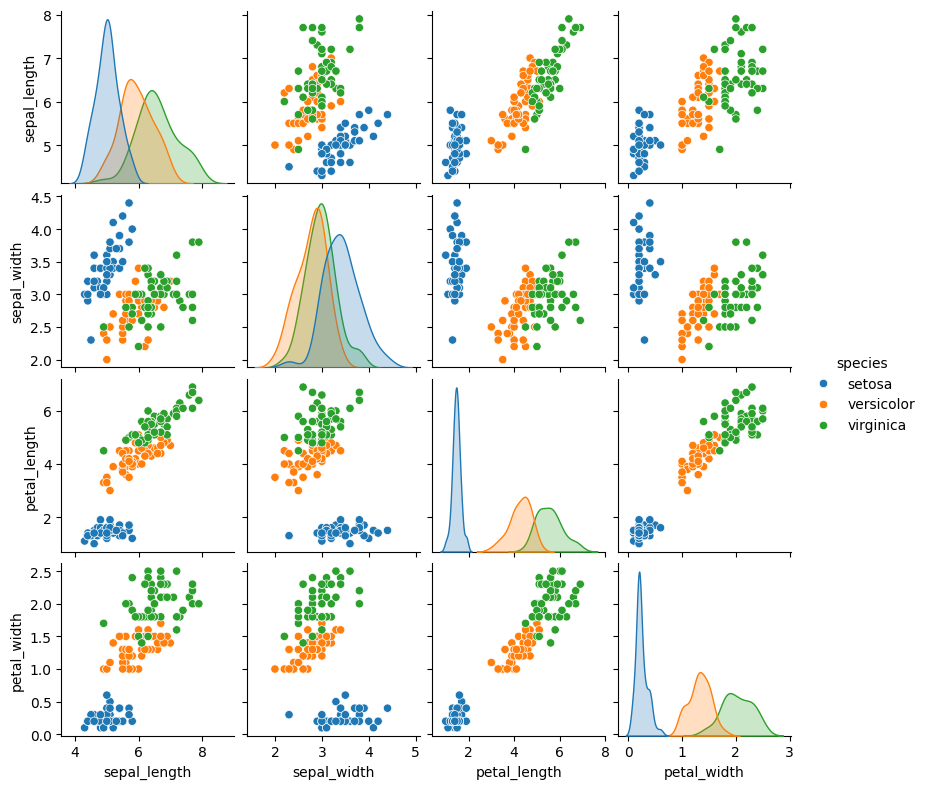

In [27]:
# Visualizations
# Pairplot to visualize relationships between features
sns.pairplot(data, hue="species",height=2)
plt.show()

***Data Preprocessing***

In [31]:
#splitting the data into features and labels

X = data.drop('species',axis =1)
y = data['species']

In [32]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [34]:
#Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

***Training the Model***

In [35]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
# predicting on test data

y_pred = model.predict(X_test)

In [37]:
Accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

In [38]:
print("Accuracy :",Accuracy)
print("Confusion Matrix :",cm)
print("Classification Report :",cr)

Accuracy : 1.0
Confusion Matrix : [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

